SUMMARY: example of how you would open a predictions file based on where I've stored the prediction files

In [78]:
#Import packages
import scipy
import h5py
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [79]:
#Set directory and check by printing
os.chdir('/gpfs/radev/pi/saxena/aj764/PairedTestingSessions/041624_KL004_TimeOut/Tracking/h5/')
print(os.getcwd())

/gpfs/radev/pi/saxena/aj764/PairedTestingSessions/041624_KL004_TimeOut/Tracking/h5


In [80]:
defaultdir = '/gpfs/radev/pi/saxena/aj764'
rootdir = f'{defaultdir}/PairedTestingSessions/'

In [103]:
#TEST FILE 
filename ='041624_Cam1_TrNum1_IS_KL004R.predictions.h5'

In [ ]:
# code to run when we actually want to make changes to the file!
# will have to run the fill missing functions method first
"""with h5py.File(filename,'r+') as f:
    locations = f["tracks"][:].T
    # fill in the missing locations
    new_locations = fill_missing(locations)
    f["tracks"][:] = new_locations.T"""

In [104]:
#Check file and file values
with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
041624_Cam1_TrNum1_IS_KL004R.predictions.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(37165, 15, 2, 1)

===nodes===
0: nose
1: earL
2: earR
3: headBase
4: foreLimbL
5: foreLimbR
6: hindLimbL
7: hindLimbR
8: tailBase
9: tailMid
10: tailTip
11: leverTop
12: leverBottom
13: magTop
14: magBottom



In [83]:
#frame_count, node_count, _, instance_count = locations.shape

#print("frame count:", frame_count)
#print("node count:", node_count)
#print("instance count:", instance_count)

In [105]:
#Check to see how many non-nan values are there in flattened matrix (change the y parameters from 0 to 29)
norm = locations.reshape((locations.shape[0], -1))
print(norm.shape[-1])
y = norm[:,1]
x = np.flatnonzero(~np.isnan(y))
x

30


array([    0,     1,     2, ..., 37162, 37163, 37164], shape=(27409,))

In [46]:
#locations = np.nan_to_num(locations, nan=-10)

In [106]:
#Define a function to fill in missing values
from scipy.interpolate import interp1d

def fill_missing(Y, kind="linear"):
    """Fills missing values independently along each dimension after the first."""

    # Store initial shape.
    initial_shape = Y.shape

    # Flatten after first dim.
    Y = Y.reshape((initial_shape[0], -1))

    # Interpolate along each slice.
    for i in range(Y.shape[-1]):
        y = Y[:, i]

        # Build interpolant.
        x = np.flatnonzero(~np.isnan(y))
        f = interp1d(x, y[x], kind=kind, fill_value=np.nan, bounds_error=False)

        # Fill missing
        xq = np.flatnonzero(np.isnan(y))
        y[xq] = f(xq)
        
        # Fill leading or trailing NaNs with the nearest non-NaN values
        mask = np.isnan(y)
        y[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), y[~mask])

        # Save slice
        Y[:, i] = y

    # Restore to initial shape.
    Y = Y.reshape(initial_shape)

    return Y

In [107]:
#save results in new variable
locations_new = fill_missing(locations)

In [108]:
#Check if nan values have been removed
test = locations_new.reshape((locations_new.shape[0], -1))
print(test.shape[-1])
test_y = test[:,1]
test_x = np.flatnonzero(~np.isnan(test_y))
test_x

30


array([    0,     1,     2, ..., 37162, 37163, 37164], shape=(37165,))

In [109]:
#Set locations for certain features
NOSE_INDEX = 0
HB_INDEX = 3
TB_INDEX = 8

nose_loc = locations[:, NOSE_INDEX, :, :]
hb_loc = locations[:, HB_INDEX, :, :]
tb_loc = locations[:, TB_INDEX, :, :]

nose_loc_new = locations_new[:, NOSE_INDEX, :, :]
hb_loc_new = locations_new[:, HB_INDEX, :, :]
tb_loc_new = locations_new[:, TB_INDEX, :, :]

sns.set('notebook', 'ticks', font_scale=1.2)
mpl.rcParams['figure.figsize'] = [15,6]

Text(0.5, 1.0, 'Head base tracks')

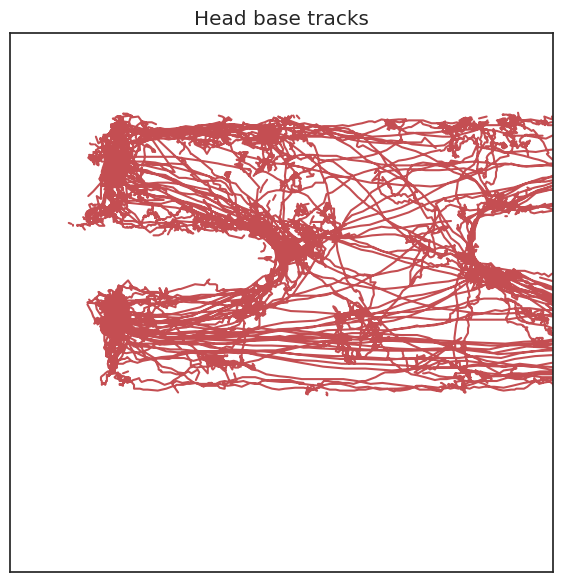

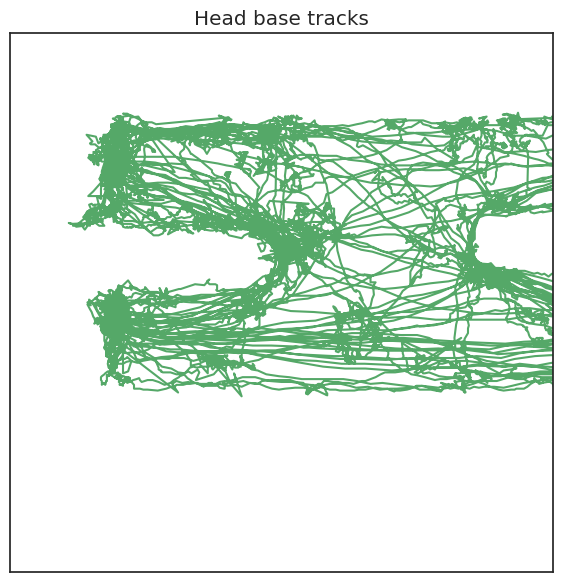

In [110]:
#Plot norm and test results side by side

#plt.figure()
#plt.plot(hb_loc[:,0,0], 'r',label='hb')

#plt.figure()
#plt.plot(hb_loc_new[:,0,0], 'b',label='hb')

#plt.plot(nose_loc[:,0,0], 'g',label='nose')

#plt.plot(-1*hb_loc[:,1,0], 'y')
#plt.plot(-1*nose_loc[:,1,0], 'g')

#plt.legend(loc="center right")
#plt.title('Head base locations')

plt.figure(figsize=(7,7))
plt.plot(hb_loc[:,0,0],hb_loc[:,1,0], 'r',label='hb')
#plt.plot(nose_loc[:,0,0],nose_loc[:,1,0], 'g',label='nose')

plt.xlim(0,1024)
plt.xticks([])

plt.ylim(-200,700)
plt.yticks([])
plt.title('Head base tracks')

plt.figure(figsize=(7,7))
plt.plot(hb_loc_new[:,0,0],hb_loc_new[:,1,0], 'g',label='hb')
#plt.plot(nose_loc[:,0,0],nose_loc[:,1,0], 'g',label='nose')

plt.xlim(0,1024)
plt.xticks([])

plt.ylim(-200,700)
plt.yticks([])
plt.title('Head base tracks')